In [4]:
import os
import tarfile
from six.moves import urllib

In [5]:
DOWNLOAD_ROOT ="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH ="datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


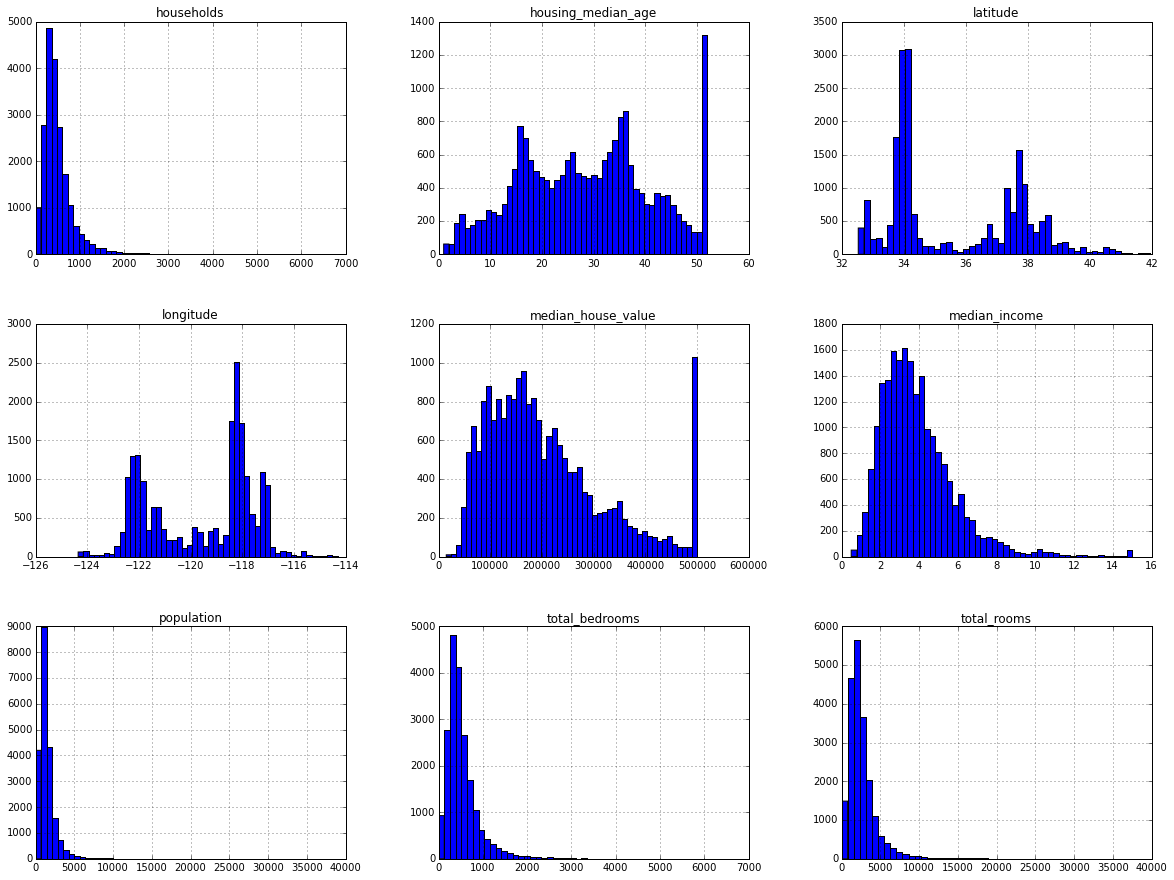

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
import numpy as np

In [14]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data))*test_ratio
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
train_set,test_set = split_train_test(housing,0.2)
print(len(train_set),"Training +",len(test_set),"Test")

16512 Training + 4128 Test


In [16]:
import hashlib

In [17]:
def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

In [18]:
def split_train_test_by_id(data,test_ratio,id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [19]:
housing_with_id = housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [20]:
print(len(train_set),"Training +",len(test_set),"Test")

16362 Training + 4278 Test


In [26]:
from sklearn.cross_validation import train_test_split

train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_set),"Training +",len(test_set),"Test")

16512 Training + 4128 Test


In [24]:
import sklearn

In [25]:
print(sklearn.__version__)

0.16.1


In [21]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)
print(len(housing))

20640


In [42]:
from sklearn.cross_validation import StratifiedShuffleSplit
num = int(len(housing))
split = StratifiedShuffleSplit(test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

TypeError: __init__() missing 1 required positional argument: 'y'

In [31]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
dtype: float64

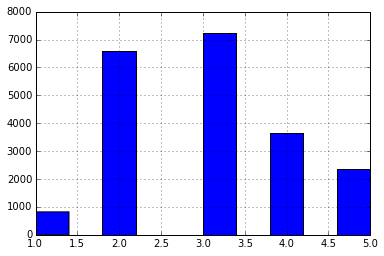

In [32]:
housing["income_cat"].hist()
plt.show()

In [33]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

NameError: name 'strat_train_set' is not defined

In [46]:
import sklearn
sklearn.info(cross_validation.StratifiedShuffleSplit)

AttributeError: 'module' object has no attribute 'info'

In [48]:
sklearn.info()

AttributeError: 'module' object has no attribute 'info'

In [22]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [24]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
6,6,-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY


In [23]:
housing=train_set.copy()

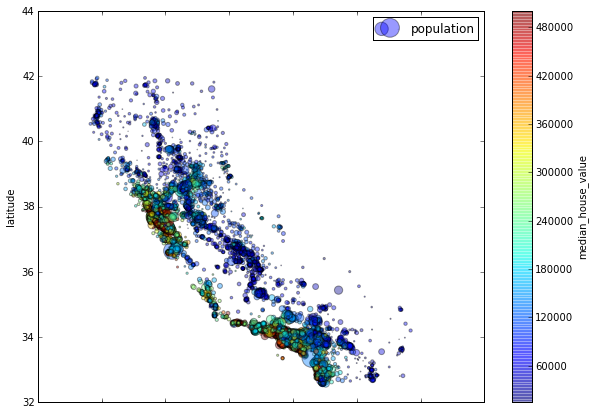

In [56]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

In [76]:
corr_matrix = housing.corr()
temp=corr_matrix["median_house_value"].copy()
np.info(temp)

One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be any hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN)

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, dict, or scalar value
    Contains data stored in Series
index : array-like or Index (1d)
    Values must be unique and hashable, same length as data. Index
    object (or other iterable of same length as data) Will default to
    np.arange(len(data)) if not provided. If both a dict and index
    sequence are used, the index will override the keys found in the
    dict.
dtype :

In [74]:
from pandas import Series
np.info(Series.sort)

 sort(self, axis=0, ascending=True, kind='quicksort', na_position='last',
      inplace=True)

Sort values and index labels by value. This is an inplace sort by default.
Series.order is the equivalent but returns a new Series.

Parameters
----------
axis : int (can only be zero)
ascending : boolean, default True
    Sort ascending. Passing False sorts descending
kind : {'mergesort', 'quicksort', 'heapsort'}, default 'quicksort'
    Choice of sorting algorithm. See np.sort for more
    information. 'mergesort' is the only stable algorithm
na_position : {'first', 'last'} (optional, default='last')
    'first' puts NaNs at the beginning
    'last' puts NaNs at the end
inplace : boolean, default True
    Do operation in place.

See Also
--------
Series.order


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07661190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x07580B90>]], dtype=object)

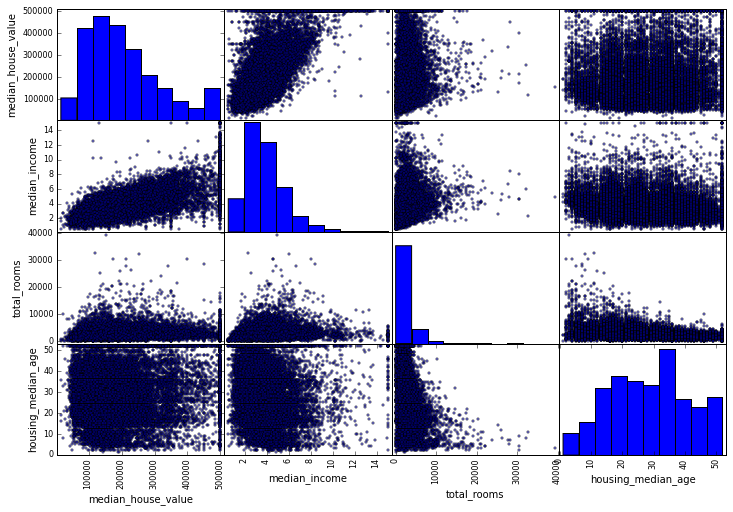

In [78]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

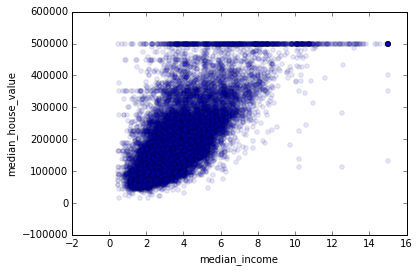

In [80]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [81]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["total_rooms"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"]

longitude                  -0.046349
latitude                   -0.142983
housing_median_age          0.103706
total_rooms                 0.133989
total_bedrooms              0.047980
population                 -0.026032
households                  0.063714
median_income               0.690647
median_house_value          1.000000
rooms_per_household         0.158485
bedrooms_per_room          -0.257419
population_per_household   -0.031160
Name: median_house_value, dtype: float64

In [47]:
housing = train_set.drop("median_house_value",axis=1)
housing_labels = train_set["median_house_value"].copy()

In [48]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values

array([  1.02620000e+04,  -1.18500000e+02,   3.42600000e+01,
         2.90000000e+01,   2.13000000e+03,   4.35000000e+02,
         1.16600000e+03,   4.10000000e+02,   3.53665000e+00])

In [26]:
X=imputer.transform(housing_num)

In [27]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [157]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

0     NEAR BAY
1     NEAR BAY
2     NEAR BAY
3     NEAR BAY
6     NEAR BAY
7     NEAR BAY
8     NEAR BAY
9     NEAR BAY
10    NEAR BAY
12    NEAR BAY
Name: ocean_proximity, dtype: object

In [158]:
housing_cat_encoded,housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [159]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [160]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]])

In [98]:
np.info(np.reshape)

 reshape(a, newshape, order='C')

Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is inferred
    from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the elements
    into the reshaped array using this index order.  'C' means to
    read / write the elements using C-like index order, with the last axis index
    changing fastest, back to the first axis index changing slowest.  'F'
    means to read / write the elements using Fortran-like index order, with
    the first index changing fastest, and the last index changing slowest.
    Note that the 'C' and 'F' options take no account of the memor

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer',Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler',StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [30]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [52]:
from sklearn.preprocessing import LabelBinarizer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer',Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler',StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

In [53]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [56]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.72465513, -1.3209473 ,  1.05000143, ...,  0.        ,
         1.        ,  0.        ],
       [-1.72448739, -1.31596264,  1.04063586, ...,  0.        ,
         1.        ,  0.        ],
       [-1.72431964, -1.32593195,  1.03595307, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 1.73692395, -0.81251236,  1.80392987, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73725944, -0.86734358,  1.77583316, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73742718, -0.82746633,  1.74773645, ...,  0.        ,
         0.        ,  0.        ]])

In [57]:
housing_prepared.shape

(16362, 17)

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
some_data = housing.iloc[:5]
some_data

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY
1,1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY
2,2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY
3,3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY
6,6,-122.25,37.84,52,2535,489,1094,514,3.6591,NEAR BAY


In [63]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Vorhersagen:", lin_reg.predict(some_data_prepared))
print ("Labels:", list(some_labels))

Vorhersagen: [ 401373.42717849  418914.87573642  372061.20977645  316084.48251373
  256105.34906368]
Labels: [452600.0, 358500.0, 352100.0, 341300.0, 299200.0]


In [60]:
num_attribs = list(housing_num)
num_attribs

['index',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [68]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68470.744674074522

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [93]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared, housing_labels,scoring="mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [94]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mittelwert:", scores.mean())
    print("Standardabweichung:",scores.std())

display_scores(tree_rmse_scores)

Scores: [ 135187.11587945   78340.39030088   89942.24294559   75421.83675624
  100997.26450923   80335.77866248   73141.21199601  110821.45426865
   93188.56096084  144423.76570547]
Mittelwert: 98179.9621985
Standardabweichung: 23717.9935697


In [92]:
lin_scores = cross_val_score(lin_reg,housing_prepared, housing_labels,scoring="mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 89783.33758199  62186.98291123  90835.14648817  62000.31249861
  82329.85979522  69850.56787115  54710.11463797  90261.28821184
  77144.9665795   57273.96142154]
Mittelwert: 73637.6537997
Standardabweichung: 13518.6816361


In [99]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

forest_scores = cross_val_score(forest_reg,housing_prepared, housing_labels,scoring="mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 92360.37514887  56798.90590965  73198.93754146  57713.21501397
  68846.385458    61330.63042906  49856.81232358  81573.5848392
  73064.32569472  99186.33968872]
Mittelwert: 71392.9512047
Standardabweichung: 15144.1989076


In [106]:
from sklearn.grid_search import GridSearchCV

param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
             ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'max_features': [2, 3, 4], 'bootstrap': [False], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='mean_squared_error', verbose=0)

In [107]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [108]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [142]:
cvres = grid_search.grid_scores_
for i in cvres:
    print(np.sqrt(-i.mean_validation_score),i.parameters)
#for mean_score, params in zip(cvres["mean"], cvres["params"]):
#    print(np.sqrt(-mean_score),params)

90449.4482594 {'max_features': 2, 'n_estimators': 3}
80421.4305536 {'max_features': 2, 'n_estimators': 10}
78784.7691225 {'max_features': 2, 'n_estimators': 30}
96230.401217 {'max_features': 4, 'n_estimators': 3}
79139.3893683 {'max_features': 4, 'n_estimators': 10}
77281.9172428 {'max_features': 4, 'n_estimators': 30}
101235.798847 {'max_features': 6, 'n_estimators': 3}
79069.3863198 {'max_features': 6, 'n_estimators': 10}
76581.3270572 {'max_features': 6, 'n_estimators': 30}
85333.4077456 {'max_features': 8, 'n_estimators': 3}
80122.2412961 {'max_features': 8, 'n_estimators': 10}
76748.7421287 {'max_features': 8, 'n_estimators': 30}
88824.9387459 {'max_features': 2, 'bootstrap': False, 'n_estimators': 3}
77892.6716497 {'max_features': 2, 'bootstrap': False, 'n_estimators': 10}
85064.1701274 {'max_features': 3, 'bootstrap': False, 'n_estimators': 3}
78114.0338131 {'max_features': 3, 'bootstrap': False, 'n_estimators': 10}
85966.3345317 {'max_features': 4, 'bootstrap': False, 'n_estima

In [115]:
np.info(grid_search)

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" method and a "predict" method like
any classifier except that the parameters of the classifier
used to predict is optimized by cross-validation.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    A object of that type is instantiated for each grid point.

param_grid : dict or list of dictionaries
    Dictionary with parameters names (string) as keys and lists of
    parameter settings to try as values, or a list of such
    dictionaries, in which case the grids spanned by each dictionary
    in the list are explored. This enables searching over any sequence
    of parameter settings.

scoring : string, callable or None, optional, default: None
    A string (see model evaluation documentation) or
    a scorer callable object / function with signature
    ``scorer(estimator, X, y)``.

fit_params : dict, o

In [146]:
D = {"spam":2, 'eggs':3}
D['spam']

2

In [148]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.93424784e-02,   8.42919976e-02,   7.49807837e-02,
         3.50759272e-02,   2.33887601e-02,   1.54384466e-02,
         1.87324976e-02,   1.50563514e-02,   3.58157020e-01,
         2.11483720e-02,   8.58194534e-02,   1.93347521e-02,
         1.71725233e-02,   1.33319027e-01,   1.76260529e-04,
         9.88120711e-03,   8.68414205e-03])

In [165]:
extra_attribs =["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs=list(encoder.active_features_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.35815701976981795, 'median_income'),
 (0.13331902717994892, 1),
 (0.085819453446452518, 'pop_per_hhold'),
 (0.084291997573049143, 'longitude'),
 (0.079342478388206503, 'index'),
 (0.074980783654234537, 'latitude'),
 (0.035075927243225412, 'housing_median_age'),
 (0.023388760136481616, 'total_rooms'),
 (0.021148371975645921, 'rooms_per_hhold'),
 (0.01933475208084505, 'bedrooms_per_room'),
 (0.018732497633546598, 'population'),
 (0.017172523252597771, 0),
 (0.015438446580330492, 'total_bedrooms'),
 (0.01505635138932984, 'households'),
 (0.0098812071125740052, 3),
 (0.0086841420546131306, 4),
 (0.00017626052910048938, 2)]

In [162]:
np.info(encoder)

Encode categorical integer features using a one-hot aka one-of-K scheme.

The input to this transformer should be a matrix of integers, denoting
the values taken on by categorical (discrete) features. The output will be
a sparse matrix where each column corresponds to one possible value of one
feature. It is assumed that input features take on values in the range
[0, n_values).

This encoding is needed for feeding categorical data to many scikit-learn
estimators, notably linear models and SVMs with the standard kernels.

Parameters
----------
n_values : 'auto', int or array of ints
    Number of values per feature.

    - 'auto' : determine value range from training data.
    - int : maximum value for all features.
    - array : maximum value per feature.

categorical_features: "all" or array of indices or mask
    Specify what features are treated as categorical.

    - 'all' (default): All features are treated as categorical.
    - array of indices: Array of categorical feature indic

In [171]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

46937.251033363566